# 4329 Session 3

Principal Component Analysis and Factor Models
* Factor Models
* PCA
* Statistical Factor Analysis

Statistical learning and model selection
* Lasso
* Ridge

#### Yield data

In [12]:
data = read.table('https://people.orie.cornell.edu/davidr/SDAFE/data/yields.txt', header = T)[,-11]
ddata = diff(as.ts(data))

# Principal components: `prcomp`

In [13]:
pca = prcomp(ddata, scale. = TRUE)

#### Variance explained

In [14]:
summary(pca)

Importance of components%s:
                          PC1    PC2     PC3     PC4    PC5     PC6    PC7
Standard deviation     2.9174 1.0222 0.54972 0.26048 0.1732 0.14397 0.1097
Proportion of Variance 0.8511 0.1045 0.03022 0.00678 0.0030 0.00207 0.0012
Cumulative Proportion  0.8511 0.9556 0.98584 0.99263 0.9956 0.99770 0.9989
                           PC8     PC9    PC10
Standard deviation     0.07457 0.06546 0.03388
Proportion of Variance 0.00056 0.00043 0.00011
Cumulative Proportion  0.99946 0.99989 1.00000

#### The loadings (eigenvectors)

In [15]:
pca$rotation

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
X1mon,0.08228573,0.93680368,0.27439245,0.1896871,-0.03161511,-0.05632103,0.001891534,-0.007397267,-0.01042100,-0.004129093
X2mon,0.30560117,0.28451236,-0.54781293,-0.6239901,0.26831196,0.24354461,-0.044467623,0.022653990,0.04607092,0.016719490
X3mon,0.32971180,0.02219620,-0.44785386,0.1379840,-0.34154958,-0.58588083,0.322035237,-0.157287111,-0.27265294,-0.092123746
X4mon,0.33773356,-0.02458943,-0.22350374,0.3119622,-0.32791686,0.04656225,-0.316704566,0.420704863,0.55914367,0.196019249
X5mon,0.33936688,-0.05689953,-0.06518434,0.3166588,-0.11140024,0.48511584,-0.386430969,-0.249138558,-0.41267253,-0.384221125
X5.5mon,0.33966084,-0.07661367,0.03855192,0.2903094,0.27328509,0.24243835,0.328483359,-0.287142909,-0.05233258,0.682966253
X6.5mon,0.33825157,-0.09023546,0.11911901,0.2104617,0.50156639,-0.02435377,0.398417845,0.247311230,0.24538572,-0.535429046
X7.5mon,0.33532358,-0.09867443,0.25506659,-0.1048163,0.36449861,-0.46816927,-0.506922558,0.231615528,-0.32142440,0.189220654
X8.5mon,0.33314095,-0.08662408,0.35049915,-0.2963443,-0.16050384,-0.15354271,-0.117114911,-0.618348759,0.45966918,-0.118912081
X9.5mon,0.32967388,-0.07657840,0.40773713,-0.3614447,-0.45336441,0.23371973,0.327654092,0.394987853,-0.25085202,0.045776647


Linear algebra reminder: two vectors are orthogonal if their dot product is 0

So what should be the result of for example: `t(pca$rotation[, 'PC1']) %*% pca$rotation[, 'PC7']`...

# Factor models

In [5]:
data = read.csv('https://people.orie.cornell.edu/davidr/SDAFE/data/Stock_FX_Bond.csv')
# Select the stock or index data (column names that ends with "_AC")
data = data[grep('_AC', colnames(data))]
# Convert to ts
data = as.ts(data)
# Convert to percent
data = 100 * (data / lag(data, -1) - 1)

In [6]:
head(data)

data.GM_AC,data.F_AC,data.UTX_AC,data.CAT_AC,data.MRK_AC,data.PFE_AC,data.IBM_AC,data.MSFT_AC,data.C_AC,data.XOM_AC,data.S.P_AC
2.4454148,3.8961039,1.092896,2.9585799,1.9900498,2.9940120,1.3209393,7.142857,4.0723982,2.4336283,2.3290728
0.3410060,1.2500000,1.081081,0.0000000,-0.7317073,1.7441860,-0.5311444,0.000000,-1.3043478,-0.2159827,0.2339506
0.5097706,4.1152263,1.069519,-0.8620690,0.2457002,0.5714286,0.4368932,6.666667,1.7621145,-0.2164502,1.0087823
-1.4370245,-0.7905138,1.058201,-0.2898551,1.2254902,1.1363636,-0.5316578,6.250000,1.2987013,0.0000000,0.7637175
0.9433962,1.5936255,-1.308901,2.0348837,-0.4842615,0.0000000,-0.4859086,0.000000,0.0000000,0.4338395,0.5635883
-0.1699235,1.9607843,-1.061008,0.5698006,-1.2165450,0.0000000,-1.5625000,11.764706,0.4273504,1.9438445,0.6068102


Simple factor model with the market (last column in data is SP500 index), and 2 other stocks treated as factors

In [7]:
Mkt = data[, 11]
factor1 = data[, 9]
factor2 = data[, 10]
stocks = data[, 1:5] 
fit = lm(stocks ~ Mkt + factor1 + factor2)
coef(fit)

,data.GM_AC,data.F_AC,data.UTX_AC,data.CAT_AC,data.MRK_AC
(Intercept),0.002831656,0.009497674,0.03523024,0.04029447,0.029550340
Mkt,1.102119291,1.068293224,0.82555460,0.91510730,0.842484200
factor1,-0.019769850,0.014155008,0.04246978,0.04966791,-0.011874653
factor2,-0.057367950,-0.077216084,0.01982829,-0.01319556,0.008889204


The factor estimated covariance matrix, same notation as the book

* `t()`: matrix transpose

* `%*%`: matrix multiplication

In [8]:
sigma_F = cov(cbind(Mkt, factor1, factor2))
beta = coef(fit)[-1, ]
sigma_eps = diag(cov(fit$residuals))

t(beta) %*% sigma_F %*% beta + sigma_eps

,data.GM_AC,data.F_AC,data.UTX_AC,data.CAT_AC,data.MRK_AC
data.GM_AC,4.260596,4.255369,4.090335,4.180319,4.018864
data.F_AC,4.440178,4.439106,4.273878,4.365450,4.197752
data.UTX_AC,3.177970,3.176704,3.046767,3.122921,2.975406
data.CAT_AC,3.970169,3.970490,3.825135,3.909462,3.747528
data.MRK_AC,3.277679,3.271756,3.146585,3.216493,3.087967


The actual covariance

In [9]:
cov(stocks)

,data.GM_AC,data.F_AC,data.UTX_AC,data.CAT_AC,data.MRK_AC
data.GM_AC,4.2605957,2.6699572,1.2455745,1.4654812,0.8957578
data.F_AC,2.6699572,4.4391064,1.2740768,1.5316444,0.9780046
data.UTX_AC,1.2455745,1.2740768,3.0467665,1.3875721,0.8154347
data.CAT_AC,1.4654812,1.5316444,1.3875721,3.9094617,0.8230401
data.MRK_AC,0.8957578,0.9780046,0.8154347,0.8230401,3.0879666


--------------------------------

# Another PCA example -- approximation

Applying page 34 of lecture 5 ("Real symmetric matrices are diagonalizable by orthogonal matrices (...)")

Compute the principal components of an image of Justin Bieber

In [3]:
library(imager)
justin = load.image('http://www.drawfamousfaces.com/wp-content/uploads/2013/01/How-to-Draw-Justin-Bieber-Gray1.jpg')
justin = as.matrix(grayscale(justin))
justin = justin[, nrow(justin):1]

#### Justin as a 600x600 matrix

In [11]:
head(justin)

0.05882353,0.05882353,0.05882353,0.05882353,0.05882353,0.05882353,0.05882353,0.05882353,0.05882353,0.05490196,⋯,0.1372549,0.1372549,0.1333333,0.1372549,0.1372549,0.1372549,0.1372549,0.1333333,0.1294118,0.1294118
0.05882353,0.05882353,0.05882353,0.05882353,0.05882353,0.05882353,0.05882353,0.05882353,0.05882353,0.05490196,⋯,0.1372549,0.1333333,0.1372549,0.1372549,0.1411765,0.1411765,0.1372549,0.1372549,0.1333333,0.1333333
0.05882353,0.05882353,0.05882353,0.05882353,0.05882353,0.05882353,0.05882353,0.05882353,0.05882353,0.05490196,⋯,0.1333333,0.1333333,0.1294118,0.1333333,0.1372549,0.1372549,0.1333333,0.1294118,0.1294118,0.1333333
0.05882353,0.05882353,0.05882353,0.05882353,0.05882353,0.05882353,0.05882353,0.05882353,0.05882353,0.05490196,⋯,0.1333333,0.1333333,0.1372549,0.1411765,0.1450980,0.1450980,0.1411765,0.1411765,0.1411765,0.1450980
0.05882353,0.05882353,0.05882353,0.05882353,0.05882353,0.05882353,0.05882353,0.05882353,0.05882353,0.05490196,⋯,0.1372549,0.1411765,0.1333333,0.1372549,0.1372549,0.1372549,0.1333333,0.1333333,0.1333333,0.1372549
0.06274510,0.06274510,0.06274510,0.06274510,0.06274510,0.06274510,0.06274510,0.06274510,0.05882353,0.05882353,⋯,0.1372549,0.1411765,0.1411765,0.1411765,0.1450980,0.1450980,0.1411765,0.1411765,0.1411765,0.1411765


In [12]:
dim(justin)

[1] 600 600

`image()` just plots all the entries in the matrix as an array (same as heatmap, with grayscale)

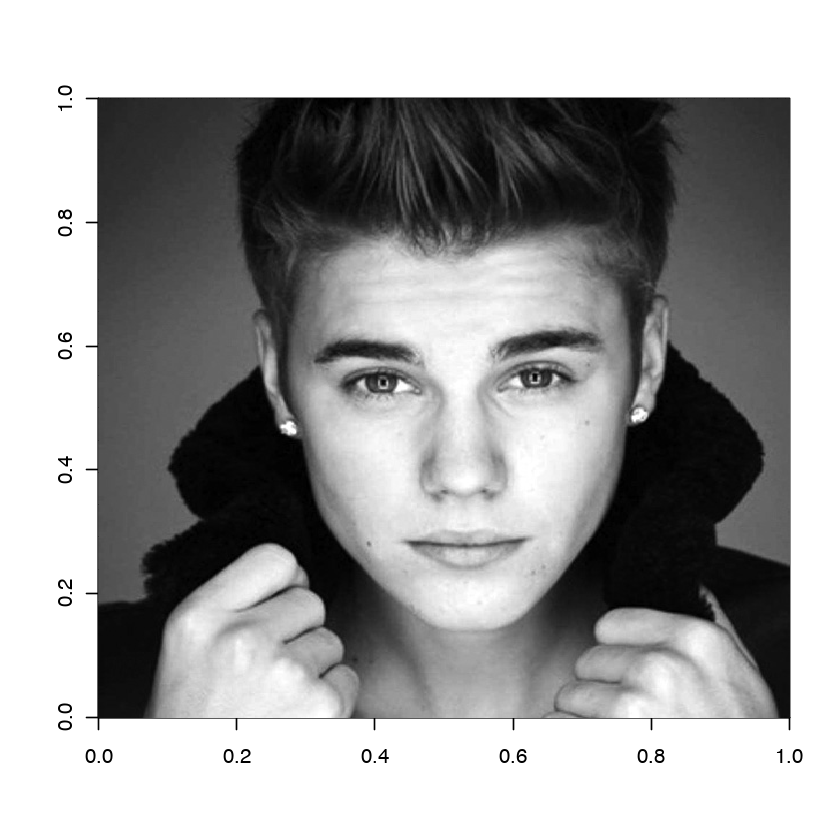

In [11]:
image(justin, col = grey(seq(0, 1, length = 256)))

Compute the PCs (for simplicity, ignore the fact that we didn't scale justin before plotting him above)

In [3]:
pcj = prcomp(justin, scale. = TRUE)

The 10 first principal components (there are 600 in total) explain 92% of the variation in Justin Bieber pixels

In [9]:
summary(pcj)

#### Reconstructing Justin with the 10 first principal components:

Using the notation in the slides (lecture 5 , page 34):

`pcj$x`: this is $y$ (called *scores* in the ISL book and denoted by $Z$)

`pcj$rotation`: this is $e$ (called *loadings* in the ISL book and denoted by $\phi$)

`justin`: this is $r$

`k`: the number of principal components (600 here, the number of asset returns, or columns of Justin Bieber pixels)

and if we only consider the first 10, i.e. let $k=10$,

then $ r \approx \sum_{i=1}^{k=10} e_i y_i $, or

$justin \approx $ `pcj$x[, 1:10] %*% t(pcj$rotation[, 1:10])`

*

In [16]:
k = 10
justin10 = pcj$x[, 1:k] %*% t(pcj$rotation[, 1:k])

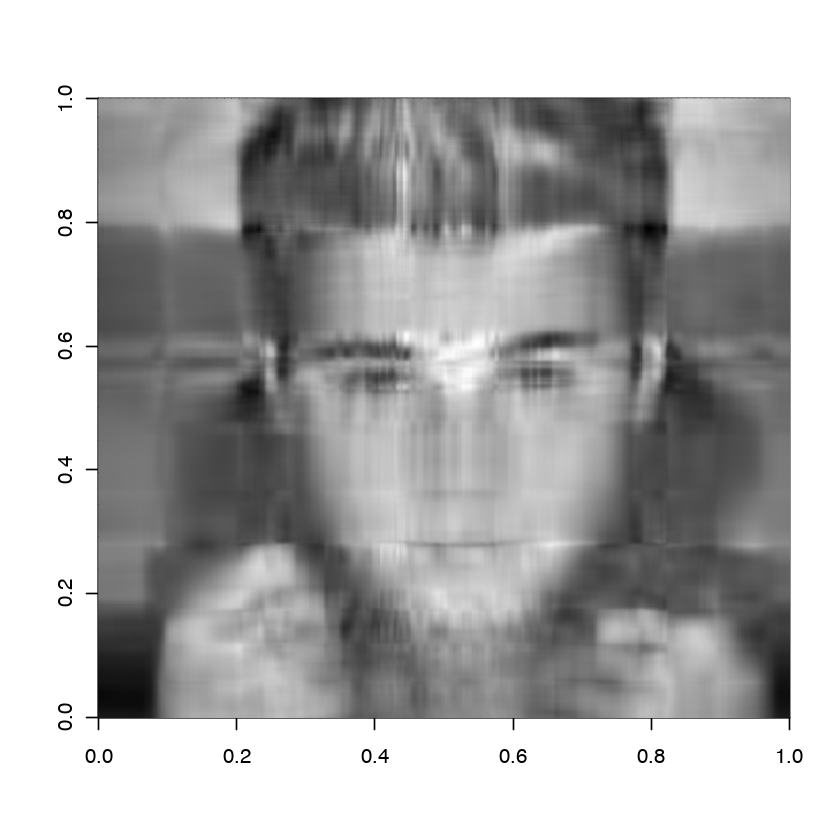

In [17]:
image(justin10, col = grey(seq(0, 1, length = 256)))

with k = 50

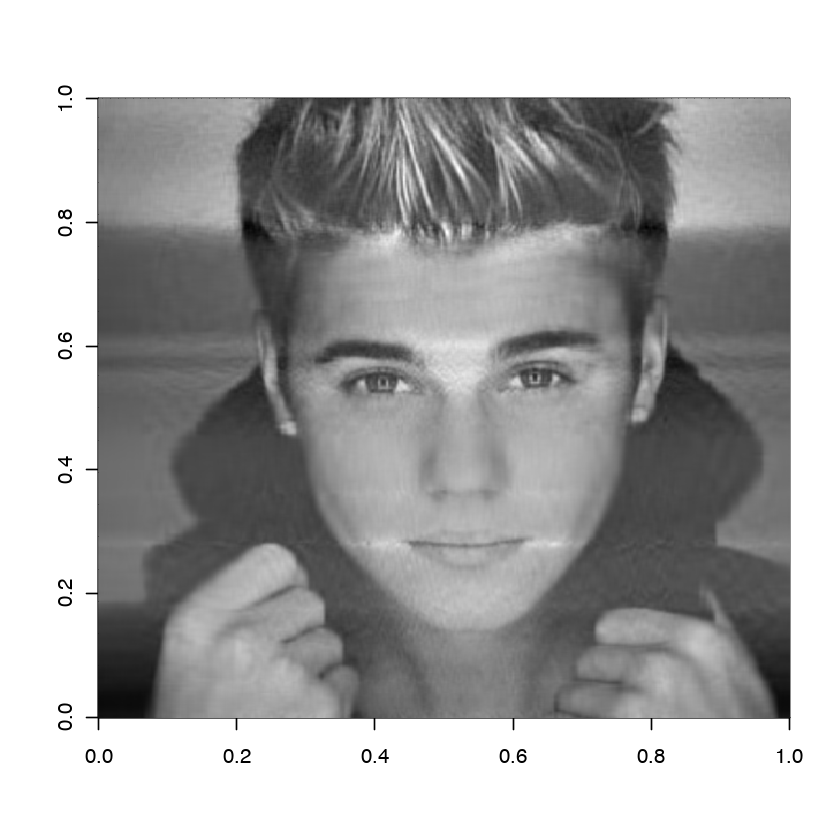

In [18]:
k = 50
justin50 = pcj$x[, 1:k] %*% t(pcj$rotation[, 1:k])
image(justin50, col = grey(seq(0, 1, length = 256)))

*(technically the final reconstruction is off by a constant scaling factor, since in the slides all the variables where assumed to have been normalized, but that was ignored here for simplicity)

-----------------------------

# PCA/factor analysis example 2, recovering the components

Say we have 100 observations of k = 2 hidden factors (Z):


In [36]:
T = 100
k = 2
Z = matrix(rnorm(k * T), nrow = T, ncol = k)
head(Z)

-0.6050489,1.18722712
1.3580535,-0.91858157
-1.1816556,0.34154553
0.8657836,-0.17118286
0.2944876,-0.03273004
-1.8102331,-0.77868323


Our observed data has say K = 15 dimensions, but is infact generated as a linear combination of the 2 latent variables (Z):

Chose a random linear combination (W: 2x15):

In [37]:
W = matrix(sample.int(2 * 15), nrow = 2, ncol = 15)
W

24,20,5,23,27,2,22,1,8,4,3,6,19,15,28
18,12,26,9,13,30,16,10,29,11,17,14,7,21,25


Our observed data (100x15) is:

In [38]:
data = Z %*% W

In [39]:
head(data)

6.848914,2.145747,27.8426606,-3.231081,-0.902368,34.406716,5.684558,11.2672223,29.5891952,10.6393027,18.3677143,12.990886,-3.185339,15.856036,12.739309
16.058816,16.138091,-17.0928532,22.967997,24.725884,-24.841340,15.179872,-7.8277622,-15.7744373,-4.6721832,-11.5417261,-4.711821,19.372946,1.080590,15.060959
-22.211916,-19.534566,2.9719056,-24.104170,-27.464610,7.883055,-20.531695,2.2337996,0.4515753,-0.9696217,2.2613071,-2.308296,-20.060638,-10.552378,-24.547720
17.697516,15.261478,-0.1218363,18.372378,21.150781,-3.403919,16.308314,-0.8460450,1.9619660,1.5801230,-0.3127578,2.798142,15.251609,9.391914,19.962370
6.478562,5.496992,0.6214570,6.478645,7.525675,-0.392926,5.955047,-0.0328128,1.4067297,0.8179200,0.3270521,1.308705,5.366154,3.729983,7.427402
-57.461893,-45.548861,-29.2969296,-48.643511,-58.999177,-26.980963,-52.284061,-9.5970654,-37.0636787,-15.8064480,-18.6683143,-21.762964,-39.845212,-43.505845,-70.153608


In [40]:
dim(data)

[1] 100  15

If we run PCA on this we can recover an estimate of the two factors:

In [41]:
pca2 = prcomp(data, scale. = TRUE)

In [42]:
summary(pca2)

Importance of components%s:
                          PC1    PC2       PC3       PC4       PC5       PC6
Standard deviation     3.4838 1.6922 1.026e-15 5.706e-16 1.482e-16 1.383e-16
Proportion of Variance 0.8091 0.1909 0.000e+00 0.000e+00 0.000e+00 0.000e+00
Cumulative Proportion  0.8091 1.0000 1.000e+00 1.000e+00 1.000e+00 1.000e+00
                             PC7       PC8       PC9      PC10    PC11
Standard deviation     1.291e-16 1.208e-16 1.109e-16 1.069e-16 9.2e-17
Proportion of Variance 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.0e+00
Cumulative Proportion  1.000e+00 1.000e+00 1.000e+00 1.000e+00 1.0e+00
                            PC12      PC13      PC14      PC15
Standard deviation     8.921e-17 8.784e-17 7.404e-17 6.625e-17
Proportion of Variance 0.000e+00 0.000e+00 0.000e+00 0.000e+00
Cumulative Proportion  1.000e+00 1.000e+00 1.000e+00 1.000e+00

The two first components account for exactly 100% of variation in the data

In [97]:
df = data.frame(factor1 = Z[,1], factor2 = Z[,2],
               pc1 = pca2$x[, 1], pc2 = pca2$x[, 2])

Since there is no ordering of the factors, from the plot below, we can see that the second principal component looks very close to factor one (first column of Z) and vice versa for the other:

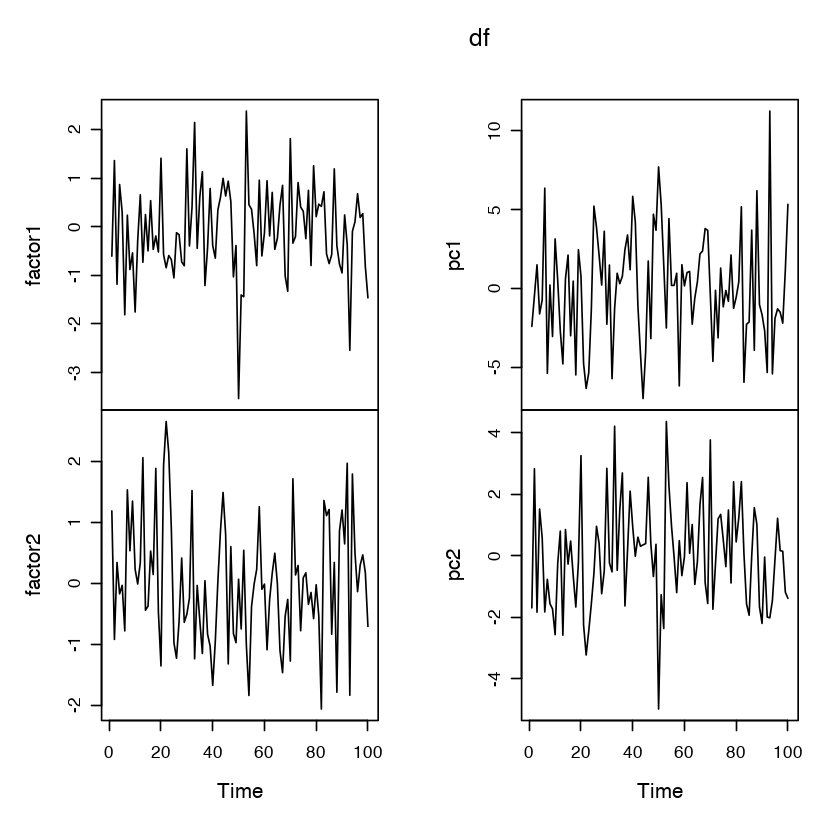

In [98]:
plot.ts(df, nc = 2)

# Stepwise regression 

In [19]:
data = read.csv('http://www-bcf.usc.edu/~gareth/ISL/Credit.csv')[, -1]

Predict `Rating` with the other variabes

In [20]:
head(data)

Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903
104.593,7075,514,4,71,11,Male,No,No,Asian,580
148.924,9504,681,3,36,11,Female,No,No,Asian,964
55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331
80.180,8047,569,4,77,10,Male,No,No,Caucasian,1151


The formula `Rating ~ .` regresses `Rating` on every other variable

# Backward stepwise regression: `step`

`lm(Rating ~ ., data)` is the full model, to perform backwise stepwise search like in page 10 of lecture 6 (based on AIC):



In [21]:
step(lm(Rating ~ ., data), direction = 'backward')

Start:  AIC=1865.55
Rating ~ Income + Limit + Cards + Age + Education + Gender + 
    Student + Married + Ethnicity + Balance

            Df Sum of Sq    RSS    AIC
- Gender     1         5  39953 1863.6
- Age        1        18  39966 1863.7
- Ethnicity  2       247  40195 1864.0
- Student    1        53  40001 1864.1
<none>                    39948 1865.5
- Education  1       212  40160 1865.7
- Married    1       522  40470 1868.7
- Balance    1       552  40500 1869.0
- Income     1       720  40668 1870.7
- Cards      1     14230  54178 1985.4
- Limit      1    202143 242091 2584.2

Step:  AIC=1863.6
Rating ~ Income + Limit + Cards + Age + Education + Student + 
    Married + Ethnicity + Balance

            Df Sum of Sq    RSS    AIC
- Age        1        18  39971 1861.8
- Ethnicity  2       246  40199 1862.0
- Student    1        51  40004 1862.1
<none>                    39953 1863.6
- Education  1       213  40166 1863.7
- Married    1       523  40476 1866.8
- Balance    1 


Call:
lm(formula = Rating ~ Income + Limit + Cards + Education + Married + 
    Balance, data = data)

Coefficients:
(Intercept)       Income        Limit        Cards    Education   MarriedYes  
   30.57853      0.09803      0.06411      4.67871     -0.24806      2.20414  
    Balance  
    0.00859  


The best model found according to this procedure is the one that includes: Income, Limit, Cards, Educatin, Married, and Balance

# Ridge regression: `glmnet` (package `glmnet`)

with option
* alpha = 0

Does not take a formula argument, but the left hand variable (x vector), and the right hand variables (y matrix)

Can construct `x` with `model.matrix` (converts strings/factors to dummies)

In [22]:
# Drop missing observations first
data = data[complete.cases(data), ]
X = model.matrix(Rating ~ ., data)[, -1] # -1 to remove the intercept, glmnet automatically includes one
y = data$Rating

In [23]:
head(X)

,Income,Limit,Cards,Age,Education,GenderFemale,StudentYes,MarriedYes,EthnicityAsian,EthnicityCaucasian,Balance
1,14.891,3606,2,34,11,0,0,1,0,1,333
2,106.025,6645,3,82,15,1,1,1,1,0,903
3,104.593,7075,4,71,11,0,0,0,1,0,580
4,148.924,9504,3,36,11,1,0,0,1,0,964
5,55.882,4897,2,68,16,0,0,1,0,1,331
6,80.180,8047,4,77,10,0,0,0,0,1,1151


Fit ridge with an automatic sequence of $\lambda$'s, the variables are standardized by default
(use `standardize = FALSE` to override)

In [42]:
library(glmnet)
ridge = glmnet(X, y, alpha = 0)

Three of the generated $\lambda$'s, from smallest, the middle, and the largest:

In [25]:
ridge$lambda[ c(length(ridge$lambda), length(ridge$lambda)/2, 1) ]    

[1]     15.40484   1613.83573 154048.44022

The corresponding estimated coefficients for the three $\lambda$s

In [26]:
coef(ridge,
    s = ridge$lambda[ c(length(ridge$lambda), length(ridge$lambda)/2, 1) ])

12 x 3 sparse Matrix of class "dgCMatrix"
                              1             2             3
(Intercept)         93.50983985 302.536028622  3.549400e+02
Income               1.05431123   0.267492457  3.509281e-36
Limit                0.03157811   0.005211713  6.749824e-38
Cards                2.22612480   0.466707856  6.067762e-36
Age                  0.07979794   0.066107584  9.346974e-37
Education           -0.14674871  -0.111754970 -1.507039e-36
GenderFemale         1.35391531   0.203892100  2.775319e-36
StudentYes         -41.22965958  -0.869970420 -1.054994e-36
MarriedYes           3.21444116   0.923958155  1.177489e-35
EthnicityAsian      -3.74581195  -0.977058448 -1.289218e-35
EthnicityCaucasian  -1.09045277  -0.031800936 -3.339477e-37
Balance              0.11175267   0.022597378  2.935743e-37

Fit ridge with a given $\lambda$

In [27]:
ridge2 = glmnet(X, y, alpha = 0, lambda = 15.405)

In [28]:
coef(ridge2)

12 x 1 sparse Matrix of class "dgCMatrix"
                             s0
(Intercept)         93.30529052
Income               1.04964193
Limit                0.03169607
Cards                2.23434010
Age                  0.07997622
Education           -0.14788551
GenderFemale         1.34759011
StudentYes         -41.05845028
MarriedYes           3.21555624
EthnicityAsian      -3.74218480
EthnicityCaucasian  -1.08999331
Balance              0.11141128

# Lasso regression: `glmnet` (package `glmnet`)

with option
* alpha = 1

In [29]:
lasso = glmnet(X, y, alpha = 1, lambda = 15.405)

In [30]:
coef(lasso)

12 x 1 sparse Matrix of class "dgCMatrix"
                            s0
(Intercept)        70.13693025
Income              .         
Limit               0.06014086
Cards               .         
Age                 .         
Education           .         
GenderFemale        .         
StudentYes          .         
MarriedYes          .         
EthnicityAsian      .         
EthnicityCaucasian  .         
Balance             .         

# Split into train and test sample 

To split evenly, just use `sample` to draw elements from `c(TRUE, FALSE)`

In [31]:
train = sample(c(TRUE, FALSE), size = nrow(X), replace = TRUE)

In [32]:
head(train)

[1] FALSE  TRUE FALSE FALSE  TRUE  TRUE

In [33]:
head(!train)

[1]  TRUE FALSE  TRUE  TRUE FALSE FALSE

In [34]:
lasso_train = glmnet(X[train, ], y[train], alpha = 1, lambda = 15.405)

The MSE on the test data

select the test set with `!train`

In [35]:
prediction = predict(lasso_train, newx = X[!train, ])
actual = y[!train]

MSE = mean((prediction - actual)^2)
MSE

[1] 309.0678

# Cross validation: `cv.glmnet` (package `glmnet`) 

Default is 10-fold cross validation

(
can draw a picture of what `cv.glmnet` is doing, easy to understand, in words:

consider a matrix $M$ with $N$ columns: for the $N$ values of $\lambda$ `glmnet` automatically picks (100 is the default). With 10-fold cross validation, this matrix will have 10 rows. For example: row 1, column 1 is the mean square error on fold 1, for $\lambda_1$.

Now take the column means of this matrix (in words: the average MSE for each $\lambda$ over the 10 folds). The minimum value of this is `cvlasso$lambda.min` below)
)

In [36]:
cvlasso = cv.glmnet(X, y, alpha = 1)

The optimal $\lambda$

(this will change slightly for every time you run the above line, since `cv.glmnet` chooses
the folds randomly)

In [37]:
cvlasso$lambda.min

[1] 0.4815117

The coefficients for the $\lambda$ with the smallest MSE

In [38]:
coef(cvlasso, s = 'lambda.min')

12 x 1 sparse Matrix of class "dgCMatrix"
                              1
(Intercept)        29.889728752
Income              0.067947670
Limit               0.064723490
Cards               4.393522802
Age                 .          
Education          -0.091809620
GenderFemale        .          
StudentYes          .          
MarriedYes          1.177928781
EthnicityAsian     -0.576079627
EthnicityCaucasian  .          
Balance             0.006037539

The test set MSE with this $\lambda$:

In [39]:
lasso_train_cv = glmnet(X[train, ], y[train], alpha = 1, lambda = cvlasso$lambda.min)

mean((predict(lasso_train_cv, newx = X[!train, ]) - y[!train])^2)

[1] 92.68163

In [40]:
coef(lasso_train_cv)

12 x 1 sparse Matrix of class "dgCMatrix"
                              s0
(Intercept)        30.5135361762
Income              0.0442434787
Limit               0.0658978620
Cards               4.1191536912
Age                 .           
Education          -0.2249193488
GenderFemale        .           
StudentYes          .           
MarriedYes          1.0757291535
EthnicityAsian     -1.8463524338
EthnicityCaucasian  .           
Balance             0.0009699413